In [1]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

## BIDEN

In [2]:
dir = 'biden_faces'
list_dir = os.listdir(dir)
#print(list_dir)
list_dir = [x.replace('.png', '') for x in list_dir]
list_dir.sort(key=int)
list_dir = [x + '.png' for x in list_dir]
#print(list_dir)

In [3]:
biden = np.zeros((len(list_dir),256,256,3),dtype=np.uint8)
j = 0

for i in list_dir:
    img = cv2.imread(os.path.join(dir,i))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    biden[j] = np.array(img)
    j += 1


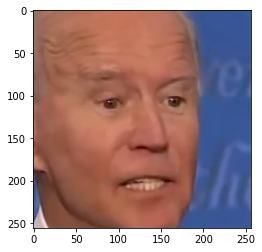

In [4]:
plt.imshow(biden[100])
plt.show()

In [2]:
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras import Sequential
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [6]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        rescale=1.0/255.0)
# Generate training data

batch_size = 16
def image_a_b_gen(batch_size):
    for batch in datagen.flow(biden, batch_size=batch_size):
        #batch = batch - 1
        yield (batch, batch)

In [7]:
def encoder_create():
    model = Sequential()
    '''
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    '''
    '''
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))
    #model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
    #model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    #model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    #model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    #model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides = 2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(Dense(8 * 8 * 256))
    model.add(Reshape((8,8,256)))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    '''
    model = Sequential()
    vgg = VGG16(include_top=False,weights='imagenet', input_shape=(256,256,3))
    for l in vgg.layers:
        l.trainable = False
    model.add(vgg)
    return model

def decoder_create():
    model = Sequential()
    '''
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
    model.add(UpSampling2D((2, 2)))
    '''
    '''
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
    model.add(UpSampling2D((2, 2)))
    '''
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Dense(8*8*512))
    model.add(Reshape((8,8,512)))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
    model.add(UpSampling2D((2, 2)))
    return model


In [22]:
#Design the neural network
biden_encoder = encoder_create()
biden_decoder = decoder_create()
biden_model = Sequential()
#biden_model.add(Input(shape=(256, 256, 3)))
biden_model.add(biden_encoder)
biden_model.add(biden_decoder)
'''
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
'''
# Finish model
biden_model.compile(optimizer='adam', loss='mse')
#biden_model.summary()

In [24]:
from tensorflow import keras

class CustomCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        test = biden[100]
        og = test.copy()
        test = test.astype('float32')
        test = test/255.0
        test = np.expand_dims(test,0)
        a = biden_model.predict(test)
        a = (a) * 255
        a = a.astype('uint8')

        fig = plt.figure()
        axes = []
        axes.append( fig.add_subplot(1, 2, 1) ) 
        axes[-1].set_title('Original')
        plt.imshow(og)
        plt.axis('off')
        #plt.show()
        axes.append( fig.add_subplot(1, 2, 2) )
        axes[-1].set_title('Generated') 
        plt.imshow(a[0])
        plt.axis('off')
        #plt.show()
        fig.tight_layout()
        title = 'train_gif2/' + str(epoch) + '.png'    
        plt.savefig(title, facecolor = "w")
        plt.close(fig)

In [25]:
test = biden[100]
og = test.copy()
test = test.astype('float32')
test = test/255.0
test = np.expand_dims(test,0)
a = biden_model.predict(test)
a = (a) * 255
a = a.astype('uint8')

fig = plt.figure()
axes = []
axes.append( fig.add_subplot(1, 2, 1) ) 
axes[-1].set_title('Original')
plt.imshow(og)
plt.axis('off')
#plt.show()
axes.append( fig.add_subplot(1, 2, 2) )
axes[-1].set_title('Generated') 
plt.imshow(a[0])
plt.axis('off')
#plt.show()
fig.tight_layout() 
#plt.savefig('train_gif/test.png', facecolor = "w")
plt.close(fig)

In [26]:
import gc
ep = 10
gc.collect()
biden_model.fit(image_a_b_gen(batch_size), steps_per_epoch=len(biden)//batch_size, epochs=ep, callbacks=[CustomCallback()])

test = biden[100]
og = test.copy()
test = test.astype('float32')
test = test/255.0
test = np.expand_dims(test,0)
a = biden_model.predict(test)
a = (a) * 255
a = a.astype('uint8')

fig = plt.figure()
axes = []
axes.append( fig.add_subplot(1, 2, 1) ) 
axes[-1].set_title('Original')
plt.imshow(og)
plt.axis('off')
        #plt.show()
axes.append( fig.add_subplot(1, 2, 2) )
axes[-1].set_title('Generated') 
plt.imshow(a[0])
plt.axis('off')
#plt.show()
fig.tight_layout()
title = 'train_gif2/' + str(ep) + '.png'    
plt.savefig(title, facecolor = "w")
plt.close(fig)

Epoch 1/10
88/88 [==============================] - 45s 499ms/step - loss: 0.6782
Epoch 2/10
88/88 [==============================] - 41s 471ms/step - loss: 0.6488
Epoch 3/10
88/88 [==============================] - 46s 527ms/step - loss: 0.6461
Epoch 4/10
88/88 [==============================] - 38s 431ms/step - loss: 0.6436
Epoch 5/10
88/88 [==============================] - 49s 565ms/step - loss: 0.6419
Epoch 6/10
88/88 [==============================] - 49s 557ms/step - loss: 0.6408
Epoch 7/10
88/88 [==============================] - 47s 537ms/step - loss: 0.6394
Epoch 8/10
88/88 [==============================] - 46s 527ms/step - loss: 0.6386
Epoch 9/10
88/88 [==============================] - 49s 559ms/step - loss: 0.6382
Epoch 10/10
88/88 [==============================] - 48s 548ms/step - loss: 0.6375


In [12]:
biden_model.save('biden2.h5')

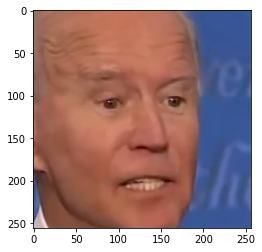

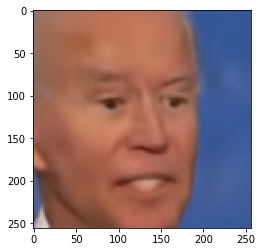

In [13]:
test = biden[100]
og = test.copy()
test = test.astype('float32')
test = test/255.0
test = np.expand_dims(test,0)
a = biden_model.predict(test)
a = (a) * 255
a = a.astype('uint8')
plt.imshow(og)
plt.show()
plt.imshow(a[0])
plt.show()

## TRUMP

In [5]:
dir = 'trump_faces'
list_dir = os.listdir(dir)
#print(list_dir)
list_dir = [x.replace('.png', '') for x in list_dir]
list_dir.sort(key=int)
list_dir = [x + '.png' for x in list_dir]
#print(list_dir)

In [6]:
trump = np.zeros((len(list_dir),256,256,3),dtype=np.uint8)
j = 0

for i in list_dir:
    img = cv2.imread(os.path.join(dir,i))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    trump[j] = np.array(img)
    j += 1

In [3]:
biden_model = []
from tensorflow import keras
biden_model = keras.models.load_model('biden.h5')
import gc
gc.collect()

1313

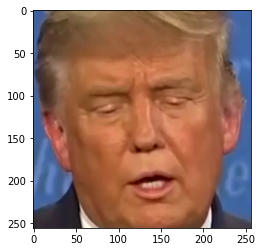

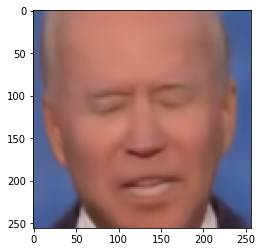

In [7]:
test = trump[0:300]
og = test.copy()
test = test.astype('float32')
test = test/255.0
#test = np.expand_dims(test,0)
a = biden_model.predict(test)
a = (a) * 255
a = a.astype('uint8')
plt.imshow(og[0])
plt.show()
plt.imshow(a[0])
plt.show()

In [8]:
for i in range(300):
    fig = plt.figure()
    axes = []
    axes.append( fig.add_subplot(1, 2, 1) ) 
    axes[-1].set_title('Original')
    plt.imshow(og[i])
    plt.axis('off')
    #plt.show()
    axes.append( fig.add_subplot(1, 2, 2) )
    axes[-1].set_title('Generated') 
    plt.imshow(a[i])
    plt.axis('off')
    #plt.show()
    fig.tight_layout()
    title = 'video/' + str(i) + '.png'    
    plt.savefig(title, facecolor = "w")
    plt.close(fig)

In [17]:
#cv2.VideoWriter('final.mp4',)

images = [img for img in os.listdir('video') if img.endswith(".png")]
images = [x.replace('.png', '') for x in images]
images.sort(key=int)
images = [x + '.png' for x in images]
frame = cv2.imread(os.path.join('video', images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter('final.mp4', 0, 30, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join('video', image)))
video.release()

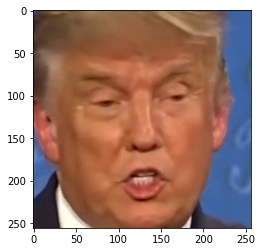

In [13]:
plt.imshow(trump[100])
plt.show()

In [14]:
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        rescale=1.0/255.0)

batch_size = 16
def image_a_b_gen(batch_size):
    for batch in datagen.flow(trump, batch_size=batch_size):
        #batch = batch - 1
        yield (batch, batch)

In [15]:
#Design the neural network
trump_encoder = encoder_create()
trump_decoder = decoder_create()
trump_model = Sequential()
#trump_model.add(Input(shape=(256, 256, 3)))
trump_model.add(trump_encoder)
trump_model.add(trump_decoder)
'''
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
'''
# Finish model
trump_model.compile(optimizer='adam', loss='mse')
#trump_model.summary()

In [16]:
import gc
gc.collect()
#trump_model.fit(image_a_b_gen(batch_size), steps_per_epoch=len(trump)//batch_size, epochs=ep)

10833

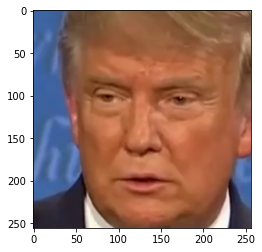

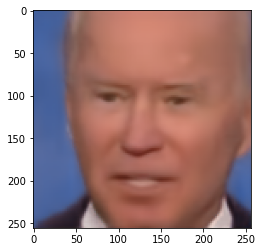

In [21]:
test = trump[300]
og = test.copy()
test = test.astype('float32')
test = test/255.0
test = np.expand_dims(test,0)
a = biden_model.predict(test)
a = (a) * 255
a = a.astype('uint8')
plt.imshow(og)
plt.show()
plt.imshow(a[0])
plt.show()

## FINAL MODEL

In [18]:
final = Sequential()
#final.add(Input(shape=(256, 256, 3)))
final.add(trump_encoder)
final.add(biden_decoder)
final.compile(optimizer='adam', loss='mse')
final.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 8, 8, 512)         14714688  
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       35155779  
                                                                 
Total params: 49,870,467
Trainable params: 35,155,779
Non-trainable params: 14,714,688
_________________________________________________________________


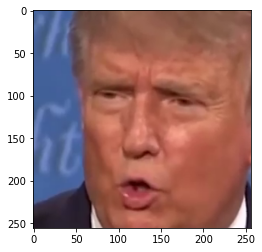

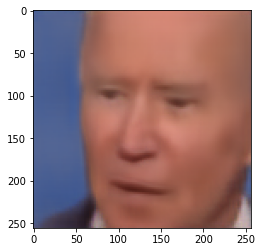

In [19]:
test = trump[1000]
og = test.copy()
test = test.astype('float32')
test = test/255.0
test = np.expand_dims(test,0)
a = final.predict(test)
a = (a) * 255
a = a.astype('uint8')
plt.imshow(og)
plt.show()
plt.imshow(a[0])
plt.show()

In [20]:
'''
model = Sequential()
model.add(Input(shape=(120, 120, 3)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(1024, (3, 3), activation='relu', padding='same', strides=2))
model.add(MaxPooling2D((2, 2), padding='same'))
#model.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))
#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
#model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides = 2))
model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(8 * 8 * 512))
model.add(Reshape((1,1,1024)))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(np.prod((120, 120, 3))))
model.add(Reshape((120, 120, 3)))

model.compile(optimizer='rmsprop', loss='mse')
model.summary()
'''

"\nmodel = Sequential()\nmodel.add(Input(shape=(120, 120, 3)))\nmodel.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))\nmodel.add(MaxPooling2D((2, 2), padding='same'))\nmodel.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))\nmodel.add(MaxPooling2D((2, 2), padding='same'))\nmodel.add(Conv2D(1024, (3, 3), activation='relu', padding='same', strides=2))\nmodel.add(MaxPooling2D((2, 2), padding='same'))\n#model.add(Conv2D(512, (3, 3), activation='relu', padding='same', strides=2))\n#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\n#model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))\n#model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))\n#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))\n#model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))\n#model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides = 2))\nmodel.add(Flatten())\nmodel.add(Dense(1024))

In [21]:
import gc
gc.collect()
#model.fit(image_a_b_gen(batch_size), steps_per_epoch=len(trump)//batch_size, epochs=20)

11900

In [22]:
'''
test = trump[140]
og = test.copy()
test = test.astype('float32')
test = test/127.5 - 1
test = np.expand_dims(test,0)
a = model.predict(test)
a = (a+1) * 127.5
a = a.astype('uint8')
plt.imshow(og)
plt.show()
plt.imshow(a[0])
plt.show()
'''


from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras import Sequential
model = Sequential()
vgg = VGG16(include_top=False,weights='imagenet', input_shape=(256,256,3))
for l in vgg.layers:
    l.trainable = False
model.add(vgg)
model.pop()
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(8*8*512))
model.add(Reshape((8,8,512)))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))
model.add(UpSampling2D((2, 2)))
print(model.summary())

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import UpSampling2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Reshape
from keras import Sequential
#model = Sequential()
vgg = VGG16(include_top=True,weights='imagenet')#, input_shape=(256,256,3))
for l in vgg.layers:
    l.trainable = False
#model.add(vgg)
#model.pop()
#model.build()
print(vgg.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam', loss='mse')
import gc
gc.collect()
model.fit(image_a_b_gen(batch_size), steps_per_epoch=len(biden)//batch_size, epochs=10)

Epoch 1/10
88/88 [==============================] - 78s 627ms/step - loss: 0.0172
Epoch 2/10
88/88 [==============================] - 60s 644ms/step - loss: 0.0076
Epoch 3/10
88/88 [==============================] - 54s 615ms/step - loss: 0.0060
Epoch 4/10
88/88 [==============================] - 57s 649ms/step - loss: 0.0050
Epoch 5/10
88/88 [==============================] - 52s 587ms/step - loss: 0.0043
Epoch 6/10
88/88 [==============================] - 46s 530ms/step - loss: 0.0039
Epoch 7/10
88/88 [==============================] - 50s 571ms/step - loss: 0.0036
Epoch 8/10
88/88 [==============================] - 50s 570ms/step - loss: 0.0033
Epoch 9/10
88/88 [==============================] - 51s 580ms/step - loss: 0.0032
Epoch 10/10
88/88 [==============================] - 50s 567ms/step - loss: 0.0030


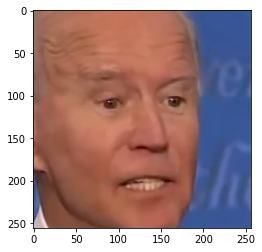

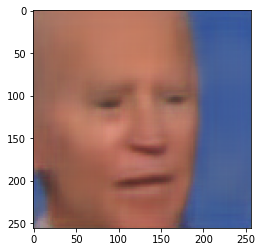

In [ ]:
test = biden[100]
og = test.copy()
test = test.astype('float32')
test = test/255.0
test = np.expand_dims(test,0)
a = model.predict(test)
a = (a) * 255
a = a.astype('uint8')
plt.imshow(og)
plt.show()
plt.imshow(a[0])
plt.show()